__Student info:__

- Student name: Thomas Brown
- Student pace: Full Time
- Scheduled project review date/time: TBD
- Instructor name: Abhineet Kulkarni
- Blog post URL: TBD

__Use Case:__<br><br>
The purpose of this project is to start building a neural network model that can determine the sentiment of financial news headlines.  The users of this model would be investment firms who want to keep track of the market sentiment of a set of various products, companies, or industries.  <br><br>
With proper web scraping and feeding of new headlines, a firm would be able to keep track of various topics to make better informed investing decisions.  For example, one could feasibly keep track of terms that are rising rapidly in terms of positive sentiment in order to invest in them.<br><br>
The data is collected from Kaggle through this [link](https://www.kaggle.com/ankurzing/sentiment-analysis-for-financial-news).  It's a collection of 4,837 unique news headlines from various financial news sources. 

## Importing Libraries:

In [1]:
import pandas as pd
import numpy as np

# Scikit-Learn:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import svm
from sklearn import tree
from sklearn.preprocessing import LabelEncoder

# Keras:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer

# Sampling:
from imblearn.over_sampling import SMOTE, ADASYN

# XGBoost:
import xgboost as xgb

# Plots and Graphs:
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import plotly.express as px
import scikitplot as skplt 
%matplotlib inline

# Other:
import warnings
warnings.filterwarnings('ignore')
# So we can see the entire column:
pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.
/Users/Thomas/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
# Keras NLP
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [3]:
# Stopwords
import nltk
from nltk.corpus import stopwords
import string
from nltk import word_tokenize, FreqDist

In [4]:
from collections import Counter

# Importing Data:

In [5]:
df = pd.read_csv('all-data.csv', names = ['Sentiment', 'Headline'], 
                 encoding='latin-1')
display(df.head())
print("Shape:", df.shape, "\n\n")
print(df.info())

,Sentiment,Headline
0,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,neutral,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,negative,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,positive,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,positive,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


Shape: (4846, 2) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
Sentiment    4846 non-null object
Headline     4846 non-null object
dtypes: object(2)
memory usage: 75.8+ KB
None


In [6]:
# Let's take a look at the number of instances of each sentiment:
df.Sentiment.value_counts()
# Not too many negatives.  This may prove to be an issue later on. . . 

neutral     2879
positive    1363
negative    604 
Name: Sentiment, dtype: int64

# Cleaning Data:

First, the labels need to be changed to numerical values in order to go through the neural network later on.

- 0 is Negative
- 1 is Neutral
- 2 is Positive

In [7]:
# Encoding Sentiment
##lb_make = LabelEncoder()
##df["Sentiment"] = lb_make.fit_transform(df["Sentiment"])
##df.head()

In [8]:
df['Sentiment'] = df['Sentiment'].map(lambda x: 1 if x == 'positive' else 0)
df.head()

,Sentiment,Headline
0,0,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
1,0,"Technopolis plans to develop in stages an area of no less than 100,000 square meters in order to host companies working in computer technologies and telecommunications , the statement said ."
2,0,"The international electronic industry company Elcoteq has laid off tens of employees from its Tallinn facility ; contrary to earlier layoffs the company contracted the ranks of its office workers , the daily Postimees reported ."
3,1,With the new production plant the company would increase its capacity to meet the expected increase in demand and would improve the use of raw materials and therefore increase the production profitability .
4,1,"According to the company 's updated strategy for the years 2009-2012 , Basware targets a long-term net sales growth in the range of 20 % -40 % with an operating profit margin of 10 % -20 % of net sales ."


## Stopwords:

Next, we can remove all the 'stopwords' that can clog up the system later on.  The punctuation will get filtered out later.

In [9]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
stop.add("'s")
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

df['Headline'] = df['Headline'].map(remove_stopwords)

In [10]:
df.head()

,Sentiment,Headline
0,0,"according gran , company plans move production russia , although company growing ."
1,0,"technopolis plans develop stages area less 100,000 square meters order host companies working computer technologies telecommunications , statement said ."
2,0,"international electronic industry company elcoteq laid tens employees tallinn facility ; contrary earlier layoffs company contracted ranks office workers , daily postimees reported ."
3,1,new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability .
4,1,"according company updated strategy years 2009-2012 , basware targets long-term net sales growth range 20 % -40 % operating profit margin 10 % -20 % net sales ."


## Tokenization and TT Split:

In [11]:
vocab_size = 11000 # approx 1/5 of the words 
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = int(df.shape[0] * .8) # Out of 4846

In [12]:
# Generating the lists of headlines and labels
headlines = []
labels = []

for row in range(len(df)):
    headlines.append(df['Headline'][row])
    labels.append(df['Sentiment'][row])

In [13]:
# Train Test Split:
training_headlines = headlines[0:training_size]
testing_headlines = headlines[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [14]:

# Initializing the fitting the tokenizer:
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(training_headlines)
# Initializing the Word Index:
word_index = tokenizer.word_index
# Padding and Sequencing the Training Set:
training_sequences = tokenizer.texts_to_sequences(training_headlines)
training_padded = pad_sequences(training_sequences, maxlen = max_length,
                               padding = padding_type, 
                               truncating = trunc_type)
# Padding and Sequencing the Testing Set:
testing_sequences = tokenizer.texts_to_sequences(testing_headlines)
testing_padded = pad_sequences(testing_sequences, maxlen = max_length, 
                               padding = padding_type, 
                               truncating = trunc_type)


In [15]:
# Switch to Numpy Array
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [16]:
# Example of what's happening under the hood:
print ('Padded and Tokenized Headline:\n', training_padded[3])
print ('\nThe actual headline:\n', df.Headline[3])
print ('\nLabel:\n', training_labels[3])

Padded and Tokenized Headline:
 [  15   60   68    2  100   65  189 1489  106   65  529  100  552  168
  650  413 1703   65   60  993    0    0    0    0    0    0    0    0
    0    0]

The actual headline:
 new production plant company would increase capacity meet expected increase demand would improve use raw materials therefore increase production profitability .

Label:
 1


# Neural Network:

Now it's time to build a baseline neural network:

In [17]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'), # Optional second hidden layer
    keras.layers.Dense(1, activation='sigmoid')]) # Binary classification
#    keras.layers.Dense(2, activation='softmax')])

model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy']) # Orig code
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # New code for 3 categories

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 16)            176000    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 11        
Total params: 176,291
Trainable params: 176,291
Non-trainable params: 0
_________________________________________________________________


In [19]:
num_epochs = 30
history = model.fit(training_padded, training_labels, 
                    epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels), 
                    verbose=2)

Train on 3876 samples, validate on 970 samples
Epoch 1/30
 - 1s - loss: 0.6429 - acc: 0.6680 - val_loss: 0.4598 - val_acc: 0.9186
Epoch 2/30
 - 0s - loss: 0.5768 - acc: 0.7054 - val_loss: 0.5346 - val_acc: 0.7155
Epoch 3/30
 - 0s - loss: 0.4563 - acc: 0.7933 - val_loss: 0.6093 - val_acc: 0.6753
Epoch 4/30
 - 0s - loss: 0.3146 - acc: 0.8746 - val_loss: 0.6129 - val_acc: 0.6969
Epoch 5/30
 - 0s - loss: 0.2064 - acc: 0.9306 - val_loss: 0.6345 - val_acc: 0.7041
Epoch 6/30
 - 0s - loss: 0.1379 - acc: 0.9574 - val_loss: 0.6666 - val_acc: 0.7103
Epoch 7/30
 - 0s - loss: 0.0983 - acc: 0.9711 - val_loss: 0.7350 - val_acc: 0.6990
Epoch 8/30
 - 0s - loss: 0.0674 - acc: 0.9804 - val_loss: 0.7275 - val_acc: 0.7258
Epoch 9/30
 - 0s - loss: 0.0495 - acc: 0.9879 - val_loss: 0.8146 - val_acc: 0.7144
Epoch 10/30
 - 0s - loss: 0.0370 - acc: 0.9925 - val_loss: 0.9662 - val_acc: 0.6928
Epoch 11/30
 - 0s - loss: 0.0285 - acc: 0.9933 - val_loss: 0.8792 - val_acc: 0.7186
Epoch 12/30
 - 0s - loss: 0.0230 - acc

## Model Notes:

- Model 1: 30 epochs, binary classification, 75% val accuracy, terrible optimization.  Super overfit.

# D E E P Neural Network:

# Unsupervised Learning / Clustering:

# Model Evaluation:

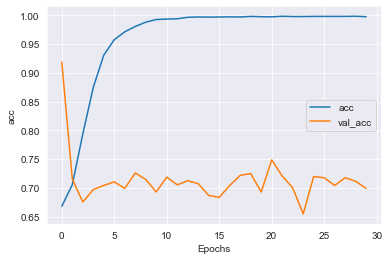

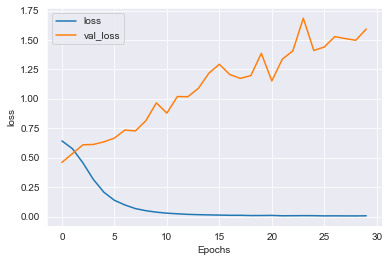

In [20]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [21]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_sentence(training_padded[0]))
print(training_headlines[2])
print(labels[2])

according gran company plans move production russia although company growing ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
international electronic industry company elcoteq laid tens employees tallinn facility ; contrary earlier layoffs company contracted ranks office workers , daily postimees reported .
0


In [22]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(11000, 16)


In [23]:
'''
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()
'''

'\nimport io\n\nout_v = io.open(\'vecs.tsv\', \'w\', encoding=\'utf-8\')\nout_m = io.open(\'meta.tsv\', \'w\', encoding=\'utf-8\')\nfor word_num in range(1, vocab_size):\n  word = reverse_word_index[word_num]\n  embeddings = weights[word_num]\n  out_m.write(word + "\n")\n  out_v.write(\'\t\'.join([str(x) for x in embeddings]) + "\n")\nout_v.close()\nout_m.close()\n'

In [24]:
# Sort of working!
sentence = ["stocks rise rapidly for Tesla", "Apple factory burns to the ground"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, 
                       padding=padding_type, 
                       truncating=trunc_type)
print(model.predict(padded))

[[9.8519325e-01]
 [7.6886121e-05]]


# Further Work:

# Conclusion:

In [25]:
# Optional Second Model:

'''
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.initializers import Constant
from keras.optimizers import Adam


model = Sequential()
model.add(Embedding(num_words, 32, input_length = max_length))
model.add(LSTM(64, dropout = .1))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy', 
              optimizer = 'Adam', 
              metrics = ['accuracy'])
model.summary()


history = model.fit(train_padded, train_labels,
                    epochs = 20,
                    validation_data = (test_padded, test_labels))

'''

"\nfrom keras.models import Sequential\nfrom keras.layers import Embedding, LSTM, Dense, Dropout\nfrom keras.initializers import Constant\nfrom keras.optimizers import Adam\n\n\nmodel = Sequential()\nmodel.add(Embedding(num_words, 32, input_length = max_length))\nmodel.add(LSTM(64, dropout = .1))\nmodel.add(Dense(1, activation = 'sigmoid'))\n\n\nmodel.compile(loss = 'binary_crossentropy', \n              optimizer = 'Adam', \n              metrics = ['accuracy'])\nmodel.summary()\n\n\nhistory = model.fit(train_padded, train_labels,\n                    epochs = 20,\n                    validation_data = (test_padded, test_labels))\n\n"